In [1]:
# Import the Python libraries
import matplotlib.pyplot as plt
import cv2
import numpy as np
import seaborn as sns

import itertools as it
import os
import glob
import os.path as osp

from sklearn.model_selection import StratifiedKFold

from sklearn import (datasets, metrics,                     
                     model_selection as skms,
                     neighbors, svm)

from sklearn.neural_network import MLPClassifier

import time
from sklearn.model_selection import cross_val_score

In [2]:
import keras

from keras.datasets import fashion_mnist

# don't usually prefer/do direct imports, but so be it ...
from keras.models import Sequential
from keras.layers import (Activation, 
                          Dense, Dropout, Flatten,
                          Conv2D, MaxPooling2D)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls "/content/gdrive/My Drive/Colab Notebooks/common"
%cd /content/gdrive/My Drive/Colab Notebooks

In [ ]:
# Import the .py file with the functions needed
from utilities import my_show, my_gshow, my_read, my_read_g, my_read_cg

Import Data

In [ ]:
fashion = fashion_mnist.load_data()
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
n_train, n_test = x_train.shape[0], x_test.shape[0]
num_classes = len(set(y_train)) # aka, 10

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Display the first 5 samples of the dataset with their corresponding labels
fig, axes = plt.subplots(1,5)
first_four_wtgt = it.islice(zip(x_train, y_train), 5)
for (image, label), ax in zip(first_four_wtgt, axes):       
    my_gshow(ax, image)
    ax.set_title("True: {}".format(label))

In [ ]:
# here we flatten the data 
# (so r,c information is lost - rely on absolute position only)
x_train = x_train.reshape(n_train, -1).astype(np.float32) / 255.0
x_test  = x_test.reshape( n_test, -1).astype(np.float32) / 255.0

flat_shape = x_train[0].shape

print('{} train and {} test examples'.format(n_train, n_test))

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)



In [ ]:
y_train

In [ ]:
def cm_helper(ax, actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True, fmt='3d', ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    
# Provide a seed for reproducibility of the results.
# By providing a seed, the randomly generated numbers will be the same every time
# you run your code. This way you can check/test your code with the same values
# Here, the random seed is 42 but you can select any number, just make sure that
# you use the same every time you run your code
np.random.seed(42)

In [ ]:
# Make sure to provide this line to display figures in the notebook
%matplotlib inline

Neural Network

In [ ]:
# Neural Network
MLP_model = MLPClassifier()

In [ ]:
# Define the set of values that will be evaluated for the hyperparameter
# Here, we are testing 
nn_param_grid = {'alpha':[0.0001, 0.05], 'activation':['tanh','relu'], 'hidden_layer_sizes': [1, 5, 10, 50]}
#nn_param_grid = {'alpha':[0.0001, 0.05], 'activation':['relu'], 'hidden_layer_sizes': [10]}#, 25, 50, 75, 100, 200]}

In [ ]:
# Takes 121 minutes to run
# Best Result: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': 50}

# Set the seed for reproducibility
np.random.seed(42)

# Start the timer to check the training time for the model
start_time = time.time()


# fit model
nn_model = skms.GridSearchCV(estimator=MLP_model,  param_grid=nn_param_grid, cv=3, return_train_score=True, verbose=1)
nn_model.fit(x_train, y_train)

end_time = time.time()
total_time = end_time - start_time
print('Time: %.2f seconds' % total_time)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached a

Time: 7429.97 seconds


In [ ]:
# Make predictions for the entire test set
nn_model_predict = nn_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN Classification Report
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.86      0.74      0.79      1000
           3       0.88      0.89      0.88      1000
           4       0.81      0.79      0.80      1000
           5       0.97      0.93      0.95      1000
           6       0.77      0.58      0.66      1000
           7       0.95      0.94      0.95      1000
           8       0.97      0.96      0.97      1000
           9       0.96      0.95      0.96      1000

   micro avg       0.90      0.85      0.88     10000
   macro avg       0.90      0.85      0.88     10000
weighted avg       0.90      0.85      0.88     10000
 samples avg       0.85      0.85      0.85     10000

NN Confusion Matrix for Best Parameters
Parameters:  {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': 50}


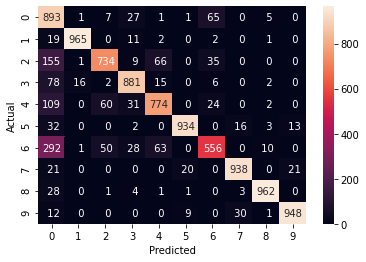

In [ ]:
# See how the model performed
report_nn_model = metrics.classification_report(y_test, nn_model_predict)
print('NN Classification Report')
print(report_nn_model)

# Display confusion matrix
cm_helper(plt.gca(), y_test.argmax(axis=1), nn_model_predict.argmax(axis=1))

print("NN Confusion Matrix for Best Parameters")
print("Parameters: ", nn_model.best_params_)

In [ ]:

# evaluate
#score = nn_model.evaluate(x_test, y_test)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

In [ ]:
nn_model_score = nn_model.score(x_test, y_test)
print(nn_model_score)

0.8373


In [ ]:
print(nn_model.cv_results_)

{'mean_fit_time': array([ 29.13801201,  97.23301053, 100.04184087, 200.36391195,
        47.07961607,  95.7774028 ,  99.42017921, 167.31073411,
        65.99912063, 121.1237359 , 108.43823806, 265.06868394,
        63.17531641, 208.83142749, 209.37071006, 533.3743089 ]), 'std_fit_time': array([26.03583193,  0.64565711,  0.2581821 ,  1.87915945, 26.03752251,
        0.56176322,  0.17325608, 23.59645959,  3.04989963, 22.44452318,
        2.67982541, 15.82806408,  3.24801433, 86.65795896, 79.98025022,
       91.2710422 ]), 'mean_score_time': array([0.07907573, 0.1481634 , 0.12907537, 0.20246172, 0.079024  ,
       0.12348747, 0.13271729, 0.20015097, 0.07862671, 0.36852082,
       0.26782433, 0.8537341 , 0.07804767, 0.62013745, 0.54212769,
       1.57518498]), 'std_score_time': array([7.44466492e-04, 3.51216454e-02, 1.19038353e-04, 3.70924195e-04,
       1.96755702e-04, 6.92242176e-04, 6.06797514e-03, 1.42597162e-03,
       7.21258231e-04, 1.92475366e-01, 5.73711416e-02, 1.02258915e-01,
  

In [ ]:
# Identifies nn_model mean training error
nn_model_mean_train = np.array(nn_model.cv_results_['mean_train_score'])
print(nn_model_mean_train)

[0.         0.791175   0.85136667 0.956725   0.         0.79698333
 0.839625   0.908425   0.16566667 0.6632     0.81330833 0.94201667
 0.12233333 0.58446667 0.81290833 0.906225  ]


In [ ]:
# Identifies nn_model nean testing error
nn_model_mean_test = np.array(nn_model.cv_results_['mean_test_score'])
print(nn_model_mean_test)

[0.         0.76393333 0.80721667 0.82975    0.         0.77526667
 0.80718333 0.84255    0.16406667 0.64996667 0.78236667 0.8308
 0.1222     0.57371667 0.79126667 0.83905   ]


In [ ]:
print(type(nn_model.param_grid))
print(nn_model.param_grid['alpha'])

<class 'dict'>
[0.0001, 0.05]


In [ ]:
print('NN Parameters')
nn_model.cv_results_['params']

NN Parameters


[{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': 1},
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': 5},
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': 10},
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': 50},
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': 1},
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': 5},
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': 10},
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': 50},
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 1},
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 5},
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 10},
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 50},
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': 1},
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': 5},
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': 10},
 {

In [ ]:
nn_model.cv_results_['params'][0:16]  # 0-3, 8-11 are alpha = 0.0001
nn_model.cv_results_['params'][0:4]+nn_model.cv_results_['params'][8:12]

[{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': 1},
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': 5},
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': 10},
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': 50},
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 1},
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 5},
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 10},
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 50}]

'activation': 'tanh', 'alpha': 0.0001

In [ ]:
nn_model_tanh1_mean_train = []
nn_model_tanh1_mean_train.extend(nn_model_mean_train[0:4])
nn_model_tanh1_mean_train

[0.0, 0.791175, 0.8513666666666667, 0.956725]

In [ ]:
nn_model_tanh1_mean_test = []
nn_model_tanh1_mean_test.extend(nn_model_mean_test[0:4])
nn_model_tanh1_mean_test

[0.0, 0.7639333333333335, 0.8072166666666667, 0.8297500000000001]

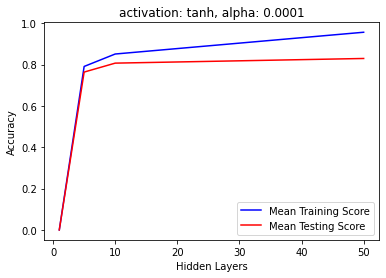

In [ ]:
plt.plot(nn_model.param_grid['hidden_layer_sizes'], nn_model_tanh1_mean_train, color='blue')
plt.plot(nn_model.param_grid['hidden_layer_sizes'], nn_model_tanh1_mean_test, color='red')
plt.xlabel('Hidden Layers')
plt.ylabel('Accuracy')
plt.title('activation: tanh, alpha: 0.0001')
plt.legend( ['Mean Training Score', 'Mean Testing Score'])

'activation': 'tanh', 'alpha': 0.05

In [ ]:
nn_model_tanh5_mean_train = []
nn_model_tanh5_mean_train.extend(nn_model_mean_train[4:8])
nn_model_tanh5_mean_train

[0.0, 0.7969833333333334, 0.839625, 0.9084249999999999]

In [ ]:
nn_model_tanh5_mean_test = []
nn_model_tanh5_mean_test.extend(nn_model_mean_test[4:8])
nn_model_tanh5_mean_test

[0.0, 0.7752666666666667, 0.8071833333333333, 0.84255]

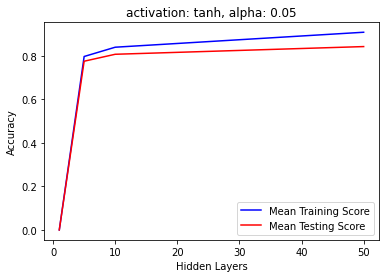

In [ ]:
plt.plot(nn_model.param_grid['hidden_layer_sizes'], nn_model_tanh5_mean_train, color='blue')
plt.plot(nn_model.param_grid['hidden_layer_sizes'], nn_model_tanh5_mean_test, color='red')
plt.xlabel('Hidden Layers')
plt.ylabel('Accuracy')
plt.title('activation: tanh, alpha: 0.05')
plt.legend( ['Mean Training Score', 'Mean Testing Score'])

'activation': 'relu', 'alpha': 0.0001

In [ ]:
nn_model_relu1_mean_train = []
nn_model_relu1_mean_train.extend(nn_model_mean_train[8:12])
nn_model_relu1_mean_train

[0.16566666666666666,
 0.6631999999999999,
 0.8133083333333332,
 0.9420166666666666]

In [ ]:
nn_model_relu1_mean_test = []
nn_model_relu1_mean_test.extend(nn_model_mean_test[8:12])
nn_model_relu1_mean_test

[0.16406666666666667, 0.6499666666666667, 0.7823666666666665, 0.8308]

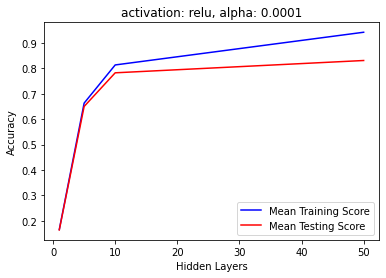

In [ ]:
plt.plot(nn_model.param_grid['hidden_layer_sizes'], nn_model_relu1_mean_train, color='blue')
plt.plot(nn_model.param_grid['hidden_layer_sizes'], nn_model_relu1_mean_test, color='red')
plt.xlabel('Hidden Layers')
plt.ylabel('Accuracy')
plt.title('activation: relu, alpha: 0.0001')
plt.legend( ['Mean Training Score', 'Mean Testing Score'])

'activation': 'relu', 'alpha': 0.05

In [ ]:
nn_model_relu5_mean_train = []
nn_model_relu5_mean_train.extend(nn_model_mean_train[12:])
nn_model_relu5_mean_train

[0.12233333333333334,
 0.5844666666666667,
 0.8129083333333332,
 0.9062250000000001]

In [ ]:
nn_model_relu5_mean_test = []
nn_model_relu5_mean_test.extend(nn_model_mean_test[12:])
nn_model_relu5_mean_test

[0.12220000000000002, 0.5737166666666668, 0.7912666666666667, 0.83905]

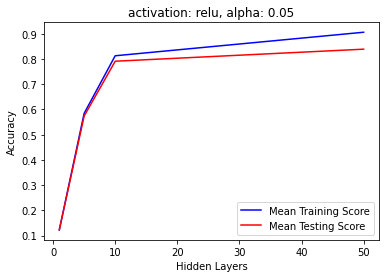

In [ ]:
plt.plot(nn_model.param_grid['hidden_layer_sizes'], nn_model_relu5_mean_train, color='blue')
plt.plot(nn_model.param_grid['hidden_layer_sizes'], nn_model_relu5_mean_test, color='red')
plt.xlabel('Hidden Layers')
plt.ylabel('Accuracy')
plt.title('activation: relu, alpha: 0.05')
plt.legend( ['Mean Training Score', 'Mean Testing Score'])

Mean Test Errors

Text(0.5, 1.0, 'Mean Training Accuracys')

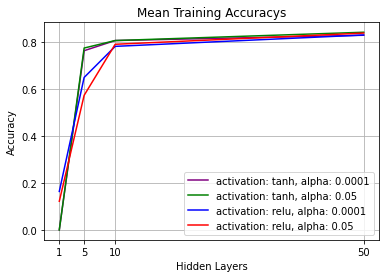

In [ ]:
tanh1, = plt.plot(nn_model.param_grid['hidden_layer_sizes'], nn_model_tanh1_mean_test, color='purple')
tanh5, = plt.plot(nn_model.param_grid['hidden_layer_sizes'], nn_model_tanh5_mean_test, color='green')
relu1, = plt.plot(nn_model.param_grid['hidden_layer_sizes'], nn_model_relu1_mean_test, color='blue')
relu5, = plt.plot(nn_model.param_grid['hidden_layer_sizes'], nn_model_relu5_mean_test, color='red')
plt.xticks(nn_model.param_grid['hidden_layer_sizes'])
plt.xlabel('Hidden Layers')
plt.ylabel('Accuracy')
plt.grid()
plt.legend( [tanh1, tanh5, relu1, relu5],['activation: tanh, alpha: 0.0001','activation: tanh, alpha: 0.05','activation: relu, alpha: 0.0001','activation: relu, alpha: 0.05'])
plt.title('Mean Training Accuracys')

In [ ]:
nn_model.param_grid['hidden_layer_sizes']

[1, 5, 10, 50]

KNN

In [ ]:
# Takes more than a day to run
# Define the set of values that will be evaluated for the hyperparameter
# Here, we are testing 1 - 11
knn_param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}

In [ ]:
# StratifiedKfold and gridsearch to find the best hyperparameter k for the KNN classifier
# Set the seed for reproducibility
np.random.seed(42)

# Start the timer to check the training time for the model
start_time = time.time()

# This is using 5-fold cross-validation. It also keeps the training scores
knncv = skms.GridSearchCV(neighbors.KNeighborsClassifier(), param_grid=knn_param_grid, cv=2, return_train_score=True, verbose=2)
#knncv = neighbors.KNeighborsClassifier(n_neighbors = 2)
knncv.fit(x_train, y_train)

end_time = time.time()
total_time = end_time - start_time
print('Time: %.2f seconds' % total_time)

Fitting 2 folds for each of 11 candidates, totalling 22 fits
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... n_neighbors=1, total=24.0min
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 29.3min remaining:    0.0s


[CV] .................................... n_neighbors=1, total=23.9min
[CV] n_neighbors=2 ...................................................


In [ ]:
# Make predictions for the entire test set
knncv_predict = knncv.predict(x_test)

In [ ]:
# See how the model performed
report_knncv = metrics.classification_report(y_test, knncv_predict)
print(report_knncv)

# Display confusion matrix
cm_helper(plt.gca(), y_test.argmax(axis=1), knncv_predict.argmax(axis=1))

print("Parameters: ", knncv.best_params_)

NameError: ignored

In [ ]:
print(knncv.cv_results_)

NameError: ignored

In [ ]:
knncv_k = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
print(knncv_k)

In [ ]:
# Identifies knn mean training error
knncv_mean_train = np.array(knncv.cv_results_['mean_train_score'])
print(knncv_mean_train)

In [ ]:
# Identifies knn nean testing error
knncv_mean_test = np.array(knncv.cv_results_['mean_test_score'])
print(knncv_mean_test)

In [ ]:
plt.plot(knncv_k, knncv_mean_train, color='blue')
plt.plot(knncv_k, knncv_mean_test, color='red')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Scores')
plt.title('Mean Train and Mean Test Scores vs. Number of Neighbors Tested')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
colors = {'Mean Train Scores':'blue', 'Mean Test Scores':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels);